<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#WEC-AC-Injection" data-toc-modified-id="WEC-AC-Injection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>WEC AC Injection</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#run-for-DC" data-toc-modified-id="run-for-DC-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>run for DC</a></span></li><li><span><a href="#run-for-AC" data-toc-modified-id="run-for-AC-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>run for AC</a></span></li><li><span><a href="#Run-WEC-Model-via-matlab-(takes-a-minute)" data-toc-modified-id="Run-WEC-Model-via-matlab-(takes-a-minute)-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Run WEC Model via matlab (takes a minute)</a></span></li><li><span><a href="#Pull-WEC-injection-values-via-SQL-database" data-toc-modified-id="Pull-WEC-injection-values-via-SQL-database-1.0.5"><span class="toc-item-num">1.0.5&nbsp;&nbsp;</span>Pull WEC injection values via SQL database</a></span></li></ul></li></ul></li></ul></div>

# WEC AC Injection

### Imports

In [1]:
import os, sys
sys.path.append('../wec-grid-code') # 
import wec_grid_class as wg
import sqlite3
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import time
import numpy as np

    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)


In [2]:
# Read in case file 
case24 = r"../input_files/RTS96DYN/IEEE_24_bus.RAW"

### run for DC 

In [3]:
# initalize WEC GRID Object
pf = wg.Wec_grid(case24,"DC",[2])


 Input error detected at !
 -m ipykernel_launcher -f C:\Users\alexb\AppData\Roaming\jupyter\runtime\kernel-85929e7e-f166-4cb2-be98-55dd0bdb4ccf.json
                          !

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2023
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.


           SIEMENS POWER TECHNOLOGIES INTERNATIONAL

    50 BUS POWER SYSTEM SIMULATOR--PSS(R)E Xplore-35.5.2

             INITIATED ON TUE, FEB 21 2023  16:44

 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 

In [4]:
pf.dataframe

,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
0,1,BUS 1,138.0,1.00000,0.000000,3,35.848999,180.356995,NaN,NaN,35.848999,180.356995
1,2,BUS 2,138.0,0.99783,-0.040022,2,67.000000,0.000000,97.0,20.000000,-30.000000,-20.000000
2,3,BUS 3,138.0,0.86395,6.057178,1,NaN,NaN,90.0,19.000000,-90.000000,-19.000000
3,4,BUS 4,138.0,0.88721,-1.528218,1,NaN,NaN,74.0,15.000001,-74.000000,-15.000001
4,5,BUS 5,138.0,0.92693,-1.332755,1,NaN,NaN,71.0,14.000000,-71.000000,-14.000000
5,6,BUS 6,138.0,0.90837,-0.366920,1,NaN,NaN,68.0,14.000000,-68.000000,-14.000000
6,7,BUS 7,138.0,0.79668,-2.524053,2,64.000000,0.000000,62.0,13.000000,2.000000,-13.000000
7,8,BUS 8,230.0,0.80581,-2.592578,1,NaN,NaN,85.0,18.000000,-85.000000,-18.000000
8,9,BUS 9,138.0,0.83528,1.781844,1,NaN,NaN,175.0,36.000000,-175.000000,-36.000000
9,10,BUS 10,138.0,0.88216,0.874911,1,NaN,NaN,100.0,23.000000,-100.000000,-23.000000


In [ ]:
pf.clear()

### run for AC 

In [ ]:
# initalize WEC GRID Object
pf = wg.Wec_grid(case24,"fnsl",[2,13, 21])

### Run WEC Model via matlab (takes a minute)

start time was 4:16 pm

In [ ]:
os.remove("../input_files/WEC-SIM.db")

In [ ]:
for i in range(1,4):
    start = time.time()
    pf.run_WEC_Sim(wec_id=i, sim_length=24*60*60, Tsample=300, waveHeight=2.5, wavePeriod=8, waveSeed=np.random.randint(999999999))
    end = time.time()
    print("WEC {} sim time: {}".format(i, end - start))
    print("=====================")

### Pull WEC injection values via SQL database

In [5]:
pf.dataframe

,BUS_ID,Bus,BASE,PU,ANGLED,Type,P Gen,Q Gen,P Load,Q Load,P,Q
0,1,BUS 1,138.0,1.00000,0.000000,3,35.848999,180.356995,NaN,NaN,35.848999,180.356995
1,2,BUS 2,138.0,0.99783,-0.040022,2,67.000000,0.000000,97.0,20.000000,-30.000000,-20.000000
2,3,BUS 3,138.0,0.86395,6.057178,1,NaN,NaN,90.0,19.000000,-90.000000,-19.000000
3,4,BUS 4,138.0,0.88721,-1.528218,1,NaN,NaN,74.0,15.000001,-74.000000,-15.000001
4,5,BUS 5,138.0,0.92693,-1.332755,1,NaN,NaN,71.0,14.000000,-71.000000,-14.000000
5,6,BUS 6,138.0,0.90837,-0.366920,1,NaN,NaN,68.0,14.000000,-68.000000,-14.000000
6,7,BUS 7,138.0,0.79668,-2.524053,2,64.000000,0.000000,62.0,13.000000,2.000000,-13.000000
7,8,BUS 8,230.0,0.80581,-2.592578,1,NaN,NaN,85.0,18.000000,-85.000000,-18.000000
8,9,BUS 9,138.0,0.83528,1.781844,1,NaN,NaN,175.0,36.000000,-175.000000,-36.000000
9,10,BUS 10,138.0,0.88216,0.874911,1,NaN,NaN,100.0,23.000000,-100.000000,-23.000000


In [6]:
con = sqlite3.connect("../input_files/WEC-SIM.db")
wec_1 = pd.read_sql_query("SELECT * from WEC_output_1", con)
wec_2 = pd.read_sql_query("SELECT * from WEC_output_2", con)
wec_3 = pd.read_sql_query("SELECT * from WEC_output_3", con)
#print(wec_1)
#print(wec_2)
#print(wec_3)
wecs_buses = [2,13, 21]
for i in range(1, 5):
#     print("Time: {}".format(injection.iloc[i].time))
#     print("P setpoint: {}".format(injection.pg.iloc[i]))
    #p = [wec_1.iloc[i].pg, wec_2.iloc[i].pg, wec_3.iloc[i].pg]
    #v = [wec_1.iloc[i].vs, wec_2.iloc[i].vs, wec_3.iloc[i].vs]
    
    pf.dc_injection(2, wec_1.iloc[i].pg, pf.solver, wec_1.iloc[i].time)
    
    print(pf.dataframe.iloc[[0,1]])
    print("========================")


 Power flow data changed for machine "1" at bus 2 [2           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    67.0000         18.1932      PG

 The working case has a largest mismatch of 103.43 MW at bus 1 [1           138.00]
                              PTI INTERACTIVE POWER SYSTEM SIMULATOR--PSS(R)E Xplore TUE, FEB 21 2023  16:44



 X----------- FROM BUS -----------X   BASE CHANGE    GEN.    LOAD X------------ TO BUS ------------X         BASE CASE    RATE1    CHANGE CASE   DELTA
   BUS#-SCT X-- NAME --X BASKV AREA  ANGLE  ANGLE     MW      MW    BUS#-SCT X-- NAME --X BASKV AREA CKT     MW      MVA     MW      MW
      1     1           138.00    1    0.0           64.5     0.0 --------------------------------------------------------------------------------
                                                                       2     2           138.00    1  1     96.5   55.1   175.0
                                                                       3     3           

In [ ]:
pf.history[450]

In [ ]:
pf.plot_bus(1)

In [ ]:
for bus in pf.wecBus_nums:
    pf.plot_bus(bus)
    print(pf.bus_history(bus))

In [ ]:
pf.bus_history(2)

In [ ]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
#f, ax = plt.subplots(1, 2, sharey=True)
sns.relplot(data=pf.swingBus, x="time", y="P")
sns.relplot(data=pf.swingBus, x="time", y="Q")

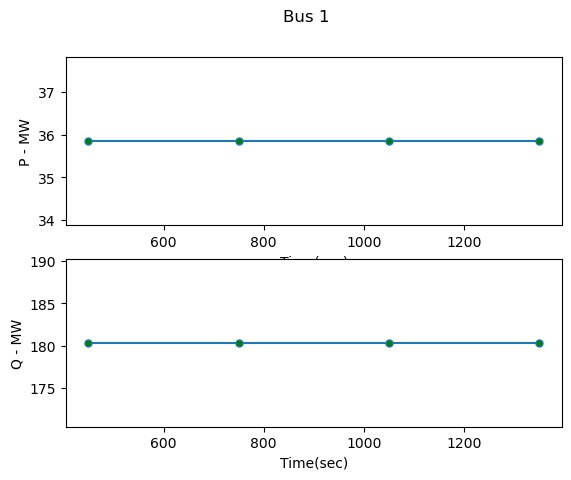

In [7]:
pf.plot_bus(1, [450, 6000])

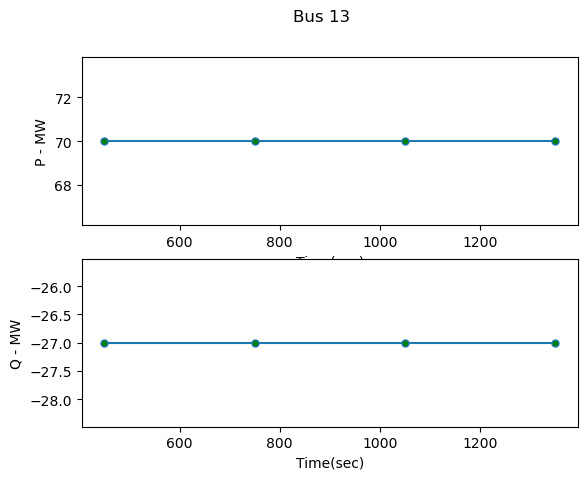

In [9]:
pf.plot_bus(13, [450, 6000])

In [ ]:
pf.history[450].loc[0].P

In [ ]:
val = 450
for i in range(len(pf.history)):
    print(pf.history[val].loc[2].P)
    print()
    val += 300

In [ ]:
pf.history[450+300]

In [ ]:
sns

In [ ]:
pf.swingBus

In [ ]:
pf.swingBus['P']

In [ ]:
pf.dataframe.iloc[[1,2]]

In [ ]:
pf.history

In [ ]:
list(pf.swingBus['time'][0])[-1] + 100

In [ ]:
injection

In [ ]:
import numpy as np

In [ ]:
np.random.randint(999999999)

In [ ]:
import os, sys

In [ ]:
os.remove("../input_files/r2g_database.db")

In [ ]:
os.system??

In [ ]:
ls ../input_files/r2g_database.db

In [ ]:
conn = sqlite3.connect('../input_files/WEC-SIM.db')

In [ ]:
os.remove("../input_files/WEC-SIM.db")

In [ ]:
for idx, bus in enumerate(pf.wecBus_nums):
    print(bus)

In [ ]:
bus_num = 1
bus_dataframe = pd.DataFrame()
for time, df in pf.history.items():
    temp = pd.DataFrame(df.loc[df["BUS_ID"] == bus_num])
    temp.insert(0, 'time', time)
    bus_dataframe = bus_dataframe.append(temp)

In [ ]:
bus_dataframe

In [ ]:
temp

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)

In [ ]:
ax1.set_ylim??